In [24]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import cv2
from skimage.filters import threshold_otsu
from skimage.measure import regionprops
import pickle

SVC(kernel='linear', probability=True)

MH03AV8866


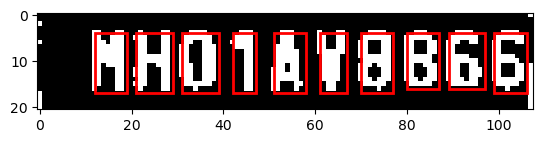

In [33]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import cv2
from skimage.filters import threshold_otsu
from skimage.measure import regionprops
import pickle

model=pickle.load(open("/Users/datle/Desktop/plate_v4/train_character_classify/finalized_model.sav",'rb'))
model
def character_extract(plate_img, show=False):
    gray= cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    thresh= threshold_otsu(gray)
    binary_plate= gray  > thresh
    # plt.imshow(binary_plate, cmap='gray')
    # plt.show()
    license_plate= np.invert(binary_plate)
    # plt.imshow(license_plate, cmap='gray')
    # plt.show()
    labelled_plate = measure.label(license_plate)
    fig, ax1 = plt.subplots(1)
    ax1.imshow(license_plate, cmap="gray")

    character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
    min_height, max_height, min_width, max_width = character_dimensions

    characters = []
    counter=0
    column_list = []

    result=[]
    for regions in regionprops(labelled_plate):
        y0, x0, y1, x1 = regions.bbox
        region_height = y1 - y0
        region_width = x1 - x0

    #     if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        if regions.area <20:
            continue
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)
        feature= resized_char.reshape(1,-1)
        label= model.predict(feature)
        result.append(label[0])
        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
    result= ''.join(result)
    print(result)
    if show == True:
        plt.show()
    return result
